In [4]:
import pandas as pd
import numpy as np

In [8]:
demand = pd.read_csv('florida/jacksonville_city_limit_demand.csv')

In [9]:
zone_centroid = pd.read_csv('florida/merge_zone_centroid.txt')

In [10]:
zone_centroid = zone_centroid[['FID','GEOID']]

In [12]:
demand['Location'] = demand['Location'].astype('str')

In [13]:
zone_centroid['FID']+=1

In [14]:
# zone_centroid.to_csv('zone_loopup_table.csv', index = False
#                     )

In [15]:
zone_centroid.head()

,FID,GEOID
0,1,121090204002
1,2,121099902000
2,3,120310161001
3,4,120310161002
4,5,120310161003


In [16]:
merge_data = pd.merge(demand, zone_centroid, left_on='Location', right_on = 'GEOID')

In [17]:
merge_data

,VID,Duration,Location,FID,GEOID
0,1,35,120030401011,281,120030401011
1,2,52,120030401011,281,120030401011
2,3,30,120030401011,281,120030401011
3,4,54,120030401011,281,120030401011
4,5,49,120030401011,281,120030401011
...,...,...,...,...,...
217147,108572,37,121090214071,495,121090214071
217148,108573,42,121090214071,495,121090214071
217149,108574,51,121090214071,495,121090214071
217150,108575,49,121090214071,495,121090214071


In [18]:
merge_data = merge_data[['VID','FID','Duration']]

In [19]:
merge_data['FID']+=1

C:\Users\lzxll\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
merge_data = merge_data.sort_values(['VID','Duration'], ascending = [True,False])

In [21]:
merge_data.to_csv('shen_demand_06022020_reindex.csv',index = False)

Visualize the demand by time tick.

In [25]:
import matplotlib.pyplot as plt

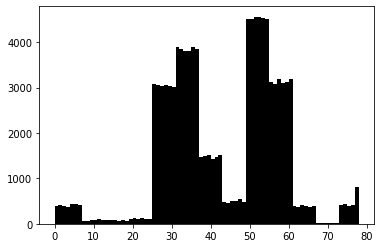

In [44]:
x = plt.hist(demand[demand['Duration']!=-1]['Duration'],bins=78, color = 'black')

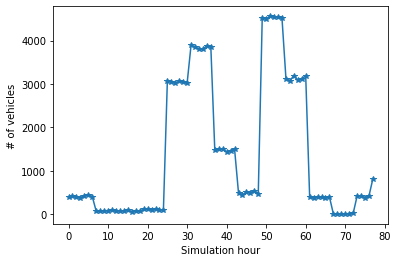

In [47]:
plt.plot(x[1][:78],x[0],'*-')

plt.ylabel("# of vehicles")
plt.xlabel('Simulation hour')
plt.show()

In [36]:
np.cumsum(x[0])[0]

391.0

In [37]:
np.cumsum(x[0])[1]

808.0

(0, 1000)

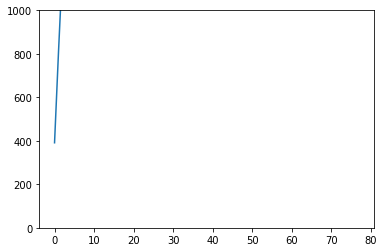

In [35]:
plt.plot(np.cumsum(x[0]))